In [ ]:
fire_df.to_csv('화재1.csv',encoding = 'cp949')
no_fire_df.to_csv('비화재1.csv',encoding = 'cp949')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

plt.rc('font', family='NanumGothic')
plt.rc('font', size=15)
plt.rc('axes', unicode_minus=False)

In [ ]:
fire_df = pd.read_csv('/content/drive/MyDrive/deu2/4월_프로젝트/dataset/화재1.csv', encoding='cp949')
no_fire_df = pd.read_csv('/content/drive/MyDrive/deu2/4월_프로젝트/dataset/비화재1.csv', encoding='cp949')

In [ ]:
fire_df = fire_df.drop(columns=['Unnamed: 0'])
fire_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,정비불량,양호,어선,2194.00,2.7,15,4.9,1028.6,58,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,정비불량,양호,어선,48.00,4.8,259,5.9,1024.0,36,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,정비불량,풍랑주의보,유조선,190.00,11.9,316,15.6,1021.8,53,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,기타,황천5급,어선,139.00,12.9,33,15.6,1016.5,69,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,관리소홀,황천4급,어선,1.98,7.2,32,9.0,1019.8,74,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,원인미상,양호,어선,9.77,10.2,329,13.0,1020.5,67,4.0,12.4,1.8,1.0,0.7,4.3,297.0
836,1,화기취급부주의,양호,어선,4.01,6.9,350,9.4,1024.7,62,-5.5,10.7,1.7,1.0,0.7,4.0,318.0
837,1,화기취급부주의,양호,어선,9.77,5.3,110,10.7,1028.5,89,-6.2,9.1,6.0,3.2,2.3,8.0,313.0
838,1,원인미상,양호,어선,5.77,9.2,9,13.0,1027.9,73,3.7,16.0,3.0,1.6,1.1,4.8,355.0


In [ ]:
no_fire_df

,Unnamed: 0,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,0,0,정비불량,황천5급,어선,1.00,15.5,302.0,20.9,1011.9,75.0,9.4,14.2,3.4,2.3,1.6,6.4,184.0
1,1,0,정비불량,양호,어선,9.77,8.6,304.0,11.3,1016.0,62.0,9.8,14.8,1.3,0.9,0.7,3.2,221.0
2,2,0,기타,양호,화물선,878.00,9.3,244.0,12.1,1015.2,58.0,9.7,14.3,1.2,0.8,0.5,3.2,215.0
3,3,0,정비불량,양호,유도선,29.00,9.9,264.0,13.3,1018.1,65.0,11.4,16.4,1.2,0.8,0.6,2.7,248.0
4,4,0,운항부주의,양호,낚시어선,4.91,7.4,339.0,10.1,1026.0,56.0,4.1,16.3,1.4,0.9,0.6,3.8,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,0,정비불량,양호,어선,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
4969,4969,0,정비불량,양호,낚시어선,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
4970,4970,0,정비불량,양호,어선,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
4971,4971,0,정비불량,양호,낚시어선,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
fire_df['발생유형'] = "1"
no_fire_df['발생유형'] = "0"

In [ ]:
no_fire_df['발생원인'] = "없음"

In [1]:
fire_df['발생원인'] = "화재"

NameError: ignored

In [ ]:
fire_df

In [ ]:
no_fire_df

,Unnamed: 0,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,0,0,없음,황천5급,어선,1.00,15.5,302.0,20.9,1011.9,75.0,9.4,14.2,3.4,2.3,1.6,6.4,184.0
1,1,0,없음,양호,어선,9.77,8.6,304.0,11.3,1016.0,62.0,9.8,14.8,1.3,0.9,0.7,3.2,221.0
2,2,0,없음,양호,화물선,878.00,9.3,244.0,12.1,1015.2,58.0,9.7,14.3,1.2,0.8,0.5,3.2,215.0
3,3,0,없음,양호,유도선,29.00,9.9,264.0,13.3,1018.1,65.0,11.4,16.4,1.2,0.8,0.6,2.7,248.0
4,4,0,없음,양호,낚시어선,4.91,7.4,339.0,10.1,1026.0,56.0,4.1,16.3,1.4,0.9,0.6,3.8,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,0,없음,양호,어선,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
4969,4969,0,없음,양호,낚시어선,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
4970,4970,0,없음,양호,어선,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
4971,4971,0,없음,양호,낚시어선,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
fire_df.columns

Index(['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [ ]:
fire_df = fire_df[['발생유형', '발생원인', '기상특보','선종', '톤수','풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]

fire_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,정비불량,양호,어선,2194.00,2.7,15,4.9,1028.6,58,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,정비불량,양호,어선,48.00,4.8,259,5.9,1024.0,36,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,정비불량,풍랑주의보,유조선,190.00,11.9,316,15.6,1021.8,53,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,기타,황천5급,어선,139.00,12.9,33,15.6,1016.5,69,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,관리소홀,황천4급,어선,1.98,7.2,32,9.0,1019.8,74,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,원인미상,양호,어선,9.77,10.2,329,13.0,1020.5,67,4.0,12.4,1.8,1.0,0.7,4.3,297.0
836,1,화기취급부주의,양호,어선,4.01,6.9,350,9.4,1024.7,62,-5.5,10.7,1.7,1.0,0.7,4.0,318.0
837,1,화기취급부주의,양호,어선,9.77,5.3,110,10.7,1028.5,89,-6.2,9.1,6.0,3.2,2.3,8.0,313.0
838,1,원인미상,양호,어선,5.77,9.2,9,13.0,1027.9,73,3.7,16.0,3.0,1.6,1.1,4.8,355.0


In [ ]:
no_fire_df = no_fire_df[['발생유형', '발생원인', '기상특보','선종', '톤수','풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]

no_fire_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,0,없음,황천5급,어선,1.00,15.5,302.0,20.9,1011.9,75.0,9.4,14.2,3.4,2.3,1.6,6.4,184.0
1,0,없음,양호,어선,9.77,8.6,304.0,11.3,1016.0,62.0,9.8,14.8,1.3,0.9,0.7,3.2,221.0
2,0,없음,양호,화물선,878.00,9.3,244.0,12.1,1015.2,58.0,9.7,14.3,1.2,0.8,0.5,3.2,215.0
3,0,없음,양호,유도선,29.00,9.9,264.0,13.3,1018.1,65.0,11.4,16.4,1.2,0.8,0.6,2.7,248.0
4,0,없음,양호,낚시어선,4.91,7.4,339.0,10.1,1026.0,56.0,4.1,16.3,1.4,0.9,0.6,3.8,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,0,없음,양호,어선,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
4969,0,없음,양호,낚시어선,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
4970,0,없음,양호,어선,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
4971,0,없음,양호,낚시어선,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
all_df = pd.concat([fire_df,no_fire_df], ignore_index=True)

all_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,정비불량,양호,어선,2194.00,2.7,15.0,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,정비불량,양호,어선,48.00,4.8,259.0,5.9,1024.0,36.0,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,정비불량,풍랑주의보,유조선,190.00,11.9,316.0,15.6,1021.8,53.0,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,기타,황천5급,어선,139.00,12.9,33.0,15.6,1016.5,69.0,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,관리소홀,황천4급,어선,1.98,7.2,32.0,9.0,1019.8,74.0,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,없음,양호,어선,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,없음,양호,낚시어선,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,없음,양호,어선,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,없음,양호,낚시어선,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
print(all_df['발생원인'].value_counts(),'\n')

없음         4973
화기취급부주의     292
관리소홀        150
정비불량        128
기타           91
기타           72
원인미상         65
안전부주의        32
재질불량          4
운항부주의         3
적재불량          2
기상악화          1
Name: 발생원인, dtype: int64 



In [ ]:
all_df["발생원인"] = all_df["발생원인"].replace({"정비불량": 1, "화기취급부주의": 2, "관리소홀" : 3, "기타": 4, "기타 " : 4, "운항부주의": 5
                                                ,"원인미상": 6, "안전부주의" : 7, "배터리 방전" : 8, "재질불량": 9, "기상악화" : 10
                                                ,"연료고갈" : 11, "적재불량" : 12})

SyntaxError: ignored

In [ ]:
all_df["발생원인"] = all_df["발생원인"].replace({"없음" : 0})

In [ ]:
print(all_df['발생원인'].value_counts(),'\n')

0     4973
2      292
4      163
3      150
1      128
6       65
7       32
9        4
5        3
12       2
10       1
Name: 발생원인, dtype: int64 



In [ ]:
print(all_df['기상특보'].value_counts(),'\n')

양호       5355
황천5급      127
풍랑주의보     123
저시정       100
황천6급       59
황천4급       27
풍랑경보       10
태풍주의보       6
태풍경보        4
황천2급        1
황천3급        1
Name: 기상특보, dtype: int64 



In [ ]:
all_df["기상특보"] = all_df["기상특보"].replace({"양호": 1, "황천5급": 2, "관리소홀" : 3, "풍랑주의보": 4, "저시정": 5
                                                ,"황천6급": 6, "황천4급" : 7, "풍랑경보" : 8, "태풍주의보": 9, "태풍경보" : 10
                                                ,"황천2급" : 11, "황천3급" : 12})

In [ ]:
print(all_df['기상특보'].value_counts(),'\n')

1     5355
2      127
4      123
5      100
6       59
7       27
8       10
9        6
10       4
11       1
12       1
Name: 기상특보, dtype: int64 



In [ ]:
print(all_df['선종'].value_counts(),'\n')

어선        3442
모터보트       739
낚시어선       563
고무보트       189
화물선        188
예부선        188
기타         162
요트         122
유조선        109
여객선         58
유도선         29
관공선         21
기타(통선)       2
호버크래프트       1
Name: 선종, dtype: int64 



In [ ]:
all_df["선종"] = all_df["선종"].replace({"어선": 1, "모터보트": 2, "낚시어선" : 3, "고무보트": 4, "화물선": 5
                                                ,"예부선": 6, "기타" : 7, "요트" : 8, "유조선": 9, "여객선" : 10
                                                ,"유도선" : 11, "관공선" : 12, "기타(통선)": 13, "호버크래프트" : 14})

In [ ]:
print(all_df['선종'].value_counts(),'\n')

1     3442
2      739
3      563
4      189
5      188
6      188
7      162
8      122
9      109
10      58
11      29
12      21
13       2
14       1
Name: 선종, dtype: int64 



In [ ]:
all_df1 = all_df
all_df1

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,1,1,1,2194.00,2.7,15.0,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,1,1,1,48.00,4.8,259.0,5.9,1024.0,36.0,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,1,4,9,190.00,11.9,316.0,15.6,1021.8,53.0,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,4,2,1,139.00,12.9,33.0,15.6,1016.5,69.0,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,3,7,1,1.98,7.2,32.0,9.0,1019.8,74.0,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,0,1,1,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,0,1,3,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,0,1,1,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,0,1,3,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [1]:
all_df

NameError: ignored

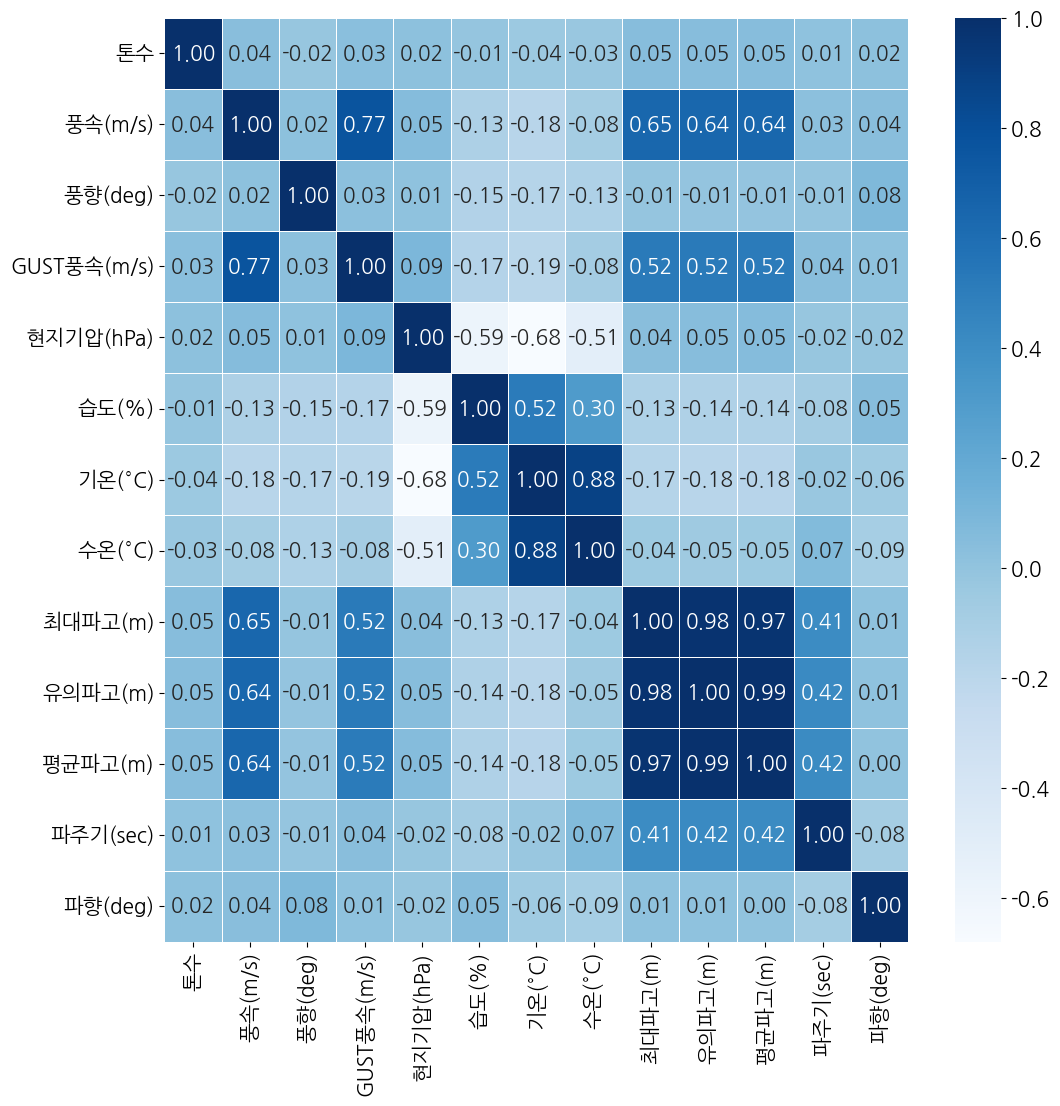

In [ ]:
# 상관관계 시각화
heat = all_df1[['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
all_df_std = scaler.fit_transform(all_df1)
all_df_std = pd.DataFrame(all_df_std, columns=all_df1.columns)

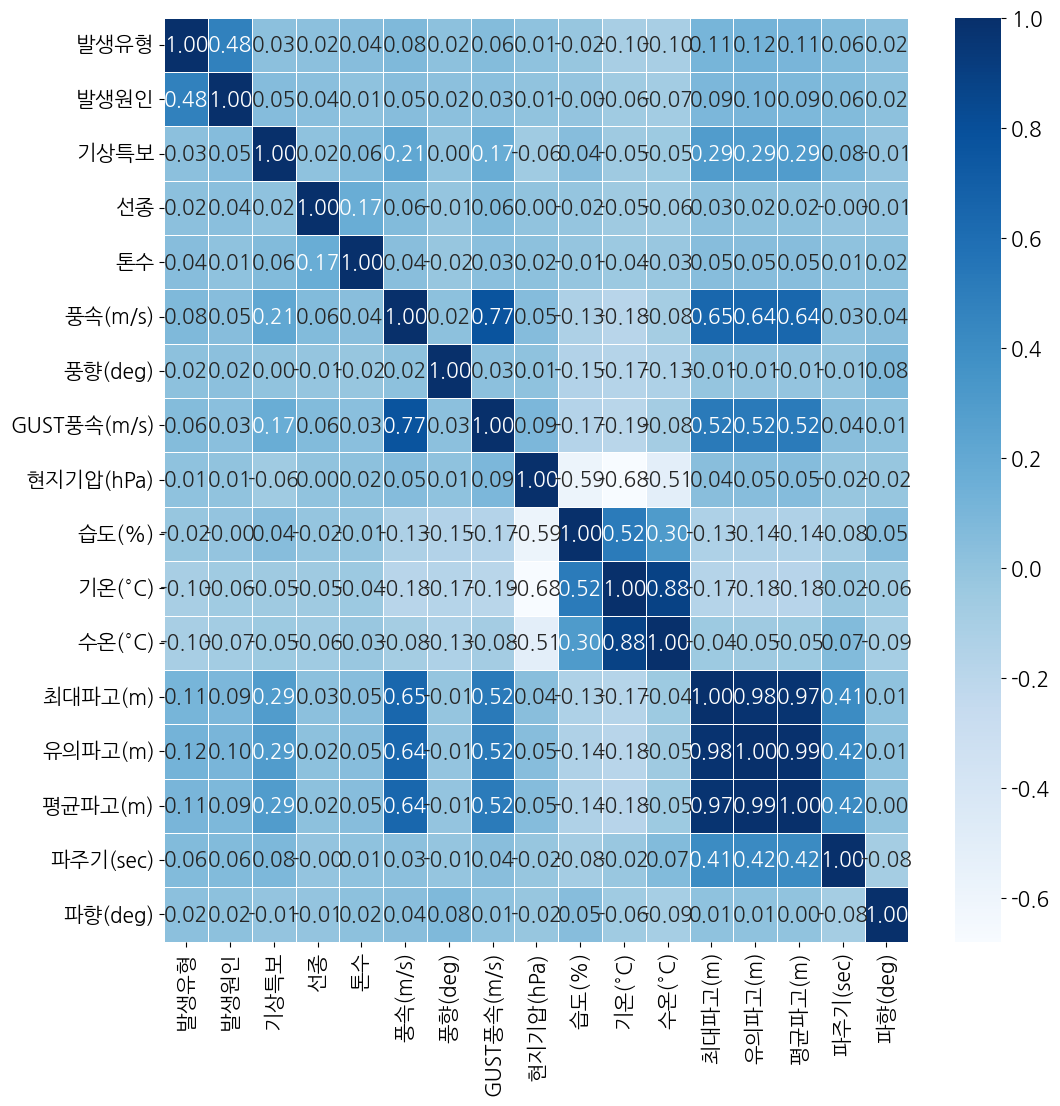

In [ ]:
# 상관관계 시각화
heat = all_df_std[['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
all_df1.columns

Index(['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [ ]:
#최소-최대 정규화
scaler = MinMaxScaler()

# 정규화할 컬럼 선택
cols_to_normalize = ['발생유형','풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)',
                     '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']

# 선택한 컬럼들 최소-최대 정규화
all_df1[cols_to_normalize] = scaler.fit_transform(all_df1[cols_to_normalize])

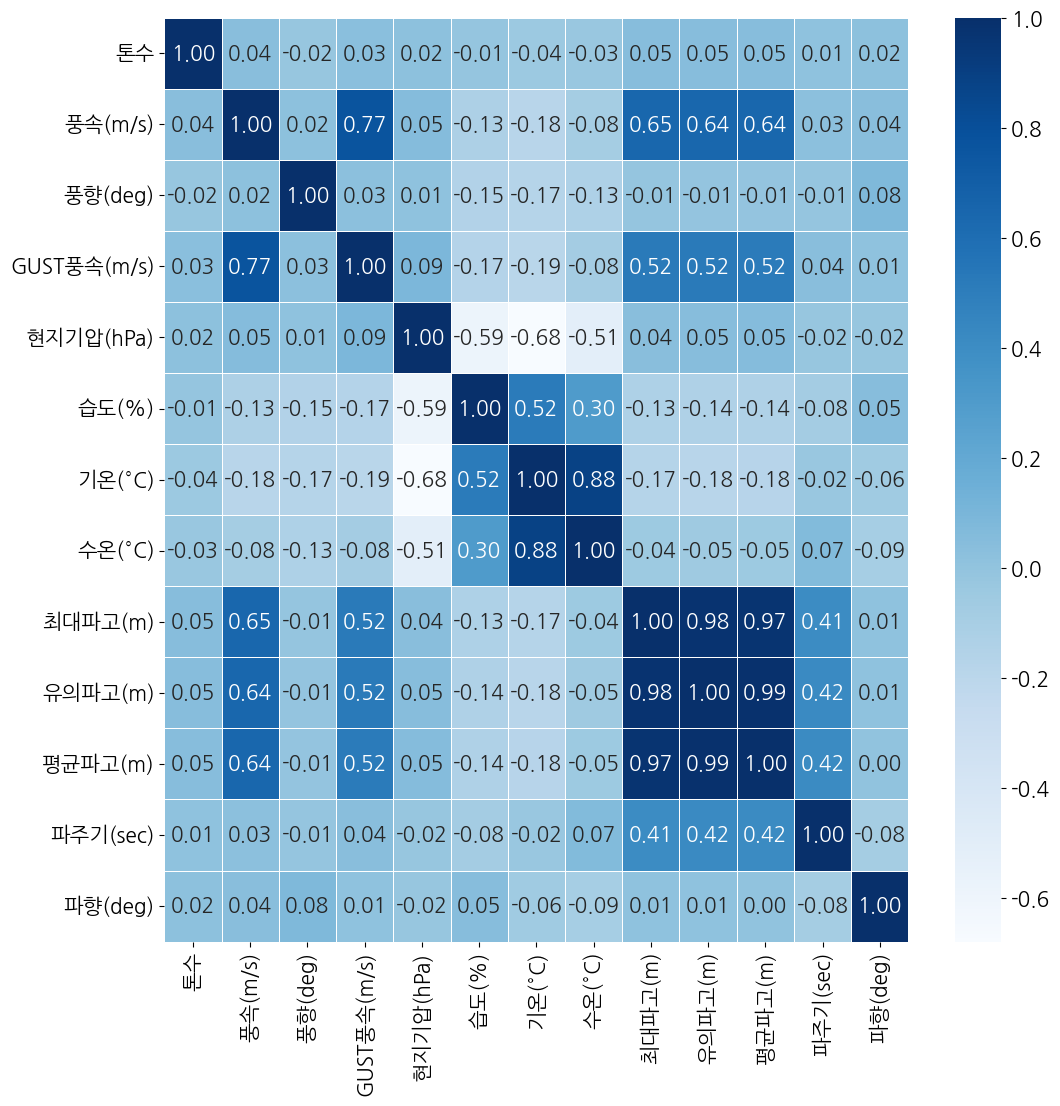

In [ ]:
# 상관관계 시각화
heat = all_df1[[ '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
all_df1.columns

Index(['톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)',
       '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)',
       '파향(deg)'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# X와 y 분리
X = all_df1[['풍속(m/s)', 
        '습도(%)', '기온(°C)']]
y = all_df1['발생유형']

#scaler = MinMaxScaler()
#X_scaler = scaler.fit_transform(X)

# train 데이터와 test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 학습된 모델을 이용하여 예측
y_pred = lr.predict(X_test)

# 정확도 계산
accuracy = lr.score(X_test, y_test)
print("모델의 정확도: {:.2f}%".format(accuracy * 100))

모델의 정확도: 0.29%


In [ ]:
all_df1.columns

Index(['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

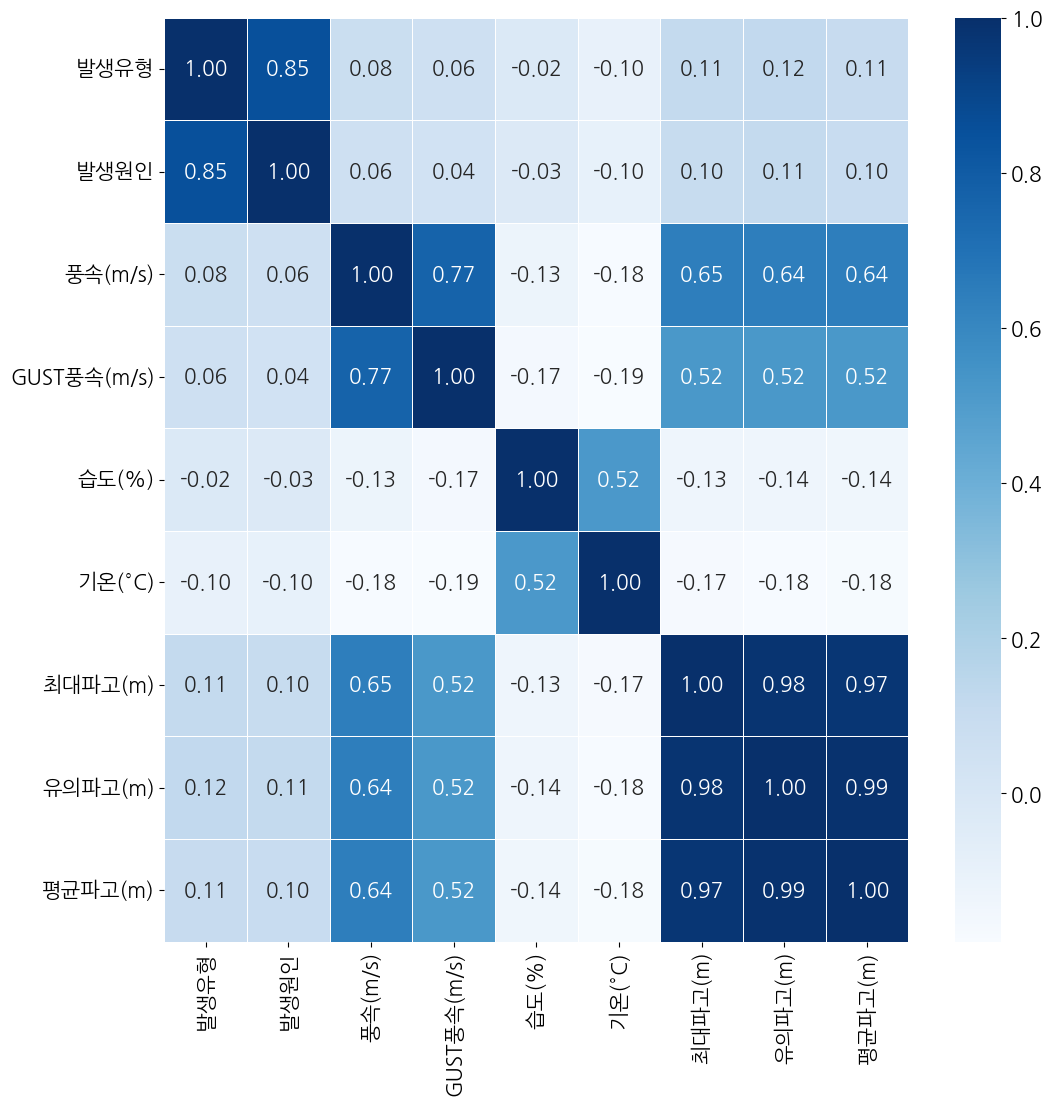

In [ ]:
# 상관관계 시각화
heat = all_df2[['발생유형', '발생원인', '풍속(m/s)', 'GUST풍속(m/s)', '습도(%)', '기온(°C)', '최대파고(m)', '유의파고(m)','평균파고(m)']]
plt.figure(figsize =(12, 12))
heat_map = sns.heatmap(heat.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
all_df2

,발생유형,발생원인,풍속(m/s),GUST풍속(m/s),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m)
0,1,1,2.7,4.9,58.0,8.6,2.2,1.4,0.7
1,1,1,4.8,5.9,36.0,7.3,1.4,0.9,0.5
2,1,1,11.9,15.6,53.0,4.1,3.5,1.4,0.7
3,1,4,12.9,15.6,69.0,13.0,3.1,2.3,1.1
4,1,3,7.2,9.0,74.0,15.8,2.4,1.6,0.8
...,...,...,...,...,...,...,...,...,...
5808,0,0,12.6,18.8,53.0,2.7,3.5,2.4,1.7
5809,0,0,7.0,9.7,56.0,5.0,2.3,1.3,0.9
5810,0,0,6.3,8.9,55.0,4.4,3.0,1.7,1.2
5811,0,0,3.5,7.6,61.0,2.4,1.5,0.8,0.6


In [ ]:
all_df2 = all_df1[['발생유형', '발생원인', '풍속(m/s)', 'GUST풍속(m/s)', '습도(%)', '기온(°C)', '최대파고(m)', '유의파고(m)','평균파고(m)']]

In [ ]:
all_df2 = all_df1[['발생유형', '발생원인', '풍속(m/s)', 'GUST풍속(m/s)', '습도(%)', '기온(°C)','평균파고(m)']]

In [ ]:
all_df3 = all_df2[['발생유형', '발생원인', '풍속(m/s)', 'GUST풍속(m/s)', '습도(%)', '기온(°C)', '최대파고(m)', '유의파고(m)','평균파고(m)']]
all_df3

,발생유형,발생원인,풍속(m/s),GUST풍속(m/s),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m)
0,1,1,2.7,4.9,58.0,8.6,2.2,1.4,0.7
1,1,1,4.8,5.9,36.0,7.3,1.4,0.9,0.5
2,1,1,11.9,15.6,53.0,4.1,3.5,1.4,0.7
3,1,4,12.9,15.6,69.0,13.0,3.1,2.3,1.1
4,1,3,7.2,9.0,74.0,15.8,2.4,1.6,0.8
...,...,...,...,...,...,...,...,...,...
5808,0,0,12.6,18.8,53.0,2.7,3.5,2.4,1.7
5809,0,0,7.0,9.7,56.0,5.0,2.3,1.3,0.9
5810,0,0,6.3,8.9,55.0,4.4,3.0,1.7,1.2
5811,0,0,3.5,7.6,61.0,2.4,1.5,0.8,0.6


In [ ]:
import numpy as np

# '발생원인'이 0인 값을 랜덤으로 0~12까지의 값으로 대체
zero_indices = all_df3[all_df3['발생원인'] == 0].index
all_df3.loc[zero_indices, '발생원인'] = np.random.randint(0, 13, len(zero_indices))
all_df3

,발생유형,발생원인,풍속(m/s),GUST풍속(m/s),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m)
0,1,1,2.7,4.9,58.0,8.6,2.2,1.4,0.7
1,1,1,4.8,5.9,36.0,7.3,1.4,0.9,0.5
2,1,1,11.9,15.6,53.0,4.1,3.5,1.4,0.7
3,1,4,12.9,15.6,69.0,13.0,3.1,2.3,1.1
4,1,3,7.2,9.0,74.0,15.8,2.4,1.6,0.8
...,...,...,...,...,...,...,...,...,...
5808,0,0,12.6,18.8,53.0,2.7,3.5,2.4,1.7
5809,0,2,7.0,9.7,56.0,5.0,2.3,1.3,0.9
5810,0,3,6.3,8.9,55.0,4.4,3.0,1.7,1.2
5811,0,10,3.5,7.6,61.0,2.4,1.5,0.8,0.6


In [2]:
# 관측년도, 관측월, 정점명으로 그룹화
sm = all_df2.groupby(['발생유형', '발생원인']).mean()

# X, y 분리
X = sm.iloc[:, :-1]
y = sm.iloc[:, -1]

# 정규화 (MinMaxScaler)

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

NameError: ignored

In [3]:
# 모델 학습 및 예측

# rmse 계산
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# r2score 계산
def r2(y_test, y_pred):
    return r2_score(y_test, y_pred)

# 모델 정의 
random_state = 42

linear = LinearRegression()
rdforest = RandomForestRegressor(random_state=random_state)
tree = DecisionTreeRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)


models = [linear, rdforest, tree, lightgbm, xgboost]

NameError: ignored

In [ ]:
# 여러모델 한번에 학습 평가 함수
def get_scores(models, X_scaler, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred), r2(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE', 'R2_Score']).transpose().sort_values('R2_Score', ascending = False)
      
            
    return score_df

get_scores(models, X_scaler, y)

In [ ]:
all_df2

,발생유형,발생원인,풍속(m/s),GUST풍속(m/s),습도(%),기온(°C),최대파고(m),유의파고(m),평균파고(m)
0,1,1,2.7,4.9,58.0,8.6,2.2,1.4,0.7
1,1,1,4.8,5.9,36.0,7.3,1.4,0.9,0.5
2,1,1,11.9,15.6,53.0,4.1,3.5,1.4,0.7
3,1,4,12.9,15.6,69.0,13.0,3.1,2.3,1.1
4,1,3,7.2,9.0,74.0,15.8,2.4,1.6,0.8
...,...,...,...,...,...,...,...,...,...
5808,0,0,12.6,18.8,53.0,2.7,3.5,2.4,1.7
5809,0,0,7.0,9.7,56.0,5.0,2.3,1.3,0.9
5810,0,0,6.3,8.9,55.0,4.4,3.0,1.7,1.2
5811,0,0,3.5,7.6,61.0,2.4,1.5,0.8,0.6


In [ ]:
from sklearn.linear_model import LinearRegression

# X, y 분리
X = all_df3[['발생원인', '풍속(m/s)', 'GUST풍속(m/s)', '습도(%)', '기온(°C)', '최대파고(m)', '유의파고(m)', '평균파고(m)']]
y = all_df3['발생유형']

# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 모델 학습
model = LinearRegression()
model.fit(X_scaler, y)

# 임의의 데이터를 예측에 사용
X_new = [[9, 11.4 , 6, 36, 7.7, 3.5, 1.9, 1.2]] # 발생원인: 1, 풍속(m/s): 5.5, GUST풍속(m/s): 6.2, 습도(%): 70, 기온(°C): 20, 최대파고(m): 3.5, 유의파고(m): 2.5, 평균파고(m): 2.7
X_new_scaler = scaler.transform(X_new)
y_pred = model.predict(X_new_scaler)

print(f"발생유형의 화재 발생 확률은 {y_pred[0]*100:.2f}%입니다.")

발생유형의 화재 발생 확률은 19.22%입니다.


In [ ]:
import pickle

# 모델 저장
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# 관측년도, 관측월, 정점명으로 그룹화
sm = all_df2.groupby(['발생유형', '발생원인']).mean()

# X, y 분리
X = sm.iloc[:, :-1]
y = sm.iloc[:, -1]

# 정규화 (MinMaxScaler)

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 모델 정의 
linear = LinearRegression()
model = [linear]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# X 데이터 생성
X = [[0, 15.5 ,20.9 ,75, 9.4, 3.4, 2.3,1.6]]  # 입력할 임의의 값을 넣어줍니다.

# 정규화 (MinMaxScaler)
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 예측
y_pred = linear.predict(X_scaler)

# 결과 출력
print('발생유형 결과:', y_pred[0])


AttributeError: ignored

In [ ]:
# 관측년도, 관측월, 정점명으로 그룹화
sm = all_df2.groupby(['발생유형', '발생원인']).mean()

# X, y 분리
X = sm.iloc[:, 1:7] # 1부터 6까지 선택
y = sm.iloc[:, -1]

# 정규화 (MinMaxScaler)

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# 모델 학습 및 예측

# rmse 계산
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# r2score 계산
def r2(y_test, y_pred):
    return r2_score(y_test, y_pred)

# 모델 정의 
random_state = 42

linear = LinearRegression()
rdforest = RandomForestRegressor(random_state=random_state)
tree = DecisionTreeRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)


models = [linear, rdforest, tree, lightgbm, xgboost]

# 여러모델 한번에 학습 평가 함수
def get_scores(models, X_scaler, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred), r2(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE', 'R2_Score']).transpose().sort_values('R2_Score', ascending = False)
      
            
    return score_df

get_scores(models, X_scaler, y)

random_state = 42
linear = LinearRegression()
rdforest = RandomForestRegressor(random_state=random_state)
tree = DecisionTreeRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)

# 모델 리스트와 입력값 설정
models = [linear, rdforest, tree, lightgbm, xgboost]
X_input = [[0, 15.5, 20.9, 75, 9.4, 3.4, 2.3, 1.6]]

# 입력값 정규화
scaler = MinMaxScaler()
X_input_scaler = scaler.fit_transform(X_input)

# 모델별 예측 결과 출력
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_scaler, y)
    y_pred = model.predict(X_input_scaler)

ValueError: ignored

In [ ]:
start_df = all_df[['발생유형', '발생원인', '기상특보','선종', '톤수','풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]

start_df

,발생유형,발생원인,기상특보,선종,톤수,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,1,정비불량,양호,어선,2194.00,2.7,15.0,4.9,1028.6,58.0,8.6,16.4,2.2,1.4,0.7,6.4,285.0
1,1,정비불량,양호,어선,48.00,4.8,259.0,5.9,1024.0,36.0,7.3,16.9,1.4,0.9,0.5,3.0,248.0
2,1,정비불량,풍랑주의보,유조선,190.00,11.9,316.0,15.6,1021.8,53.0,4.1,18.5,3.5,1.4,0.7,9.1,325.0
3,1,기타,황천5급,어선,139.00,12.9,33.0,15.6,1016.5,69.0,13.0,19.7,3.1,2.3,1.1,7.1,271.0
4,1,관리소홀,황천4급,어선,1.98,7.2,32.0,9.0,1019.8,74.0,15.8,18.7,2.4,1.6,0.8,6.4,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,0,정비불량,양호,어선,9.77,12.6,308.0,18.8,1021.5,53.0,2.7,14.4,3.5,2.4,1.7,7.1,357.0
5809,0,정비불량,양호,낚시어선,3.00,7.0,281.0,9.7,1023.9,56.0,5.0,16.0,2.3,1.3,0.9,9.1,58.0
5810,0,정비불량,양호,어선,1.93,6.3,269.0,8.9,1023.9,55.0,4.4,16.0,3.0,1.7,1.2,8.0,44.0
5811,0,정비불량,양호,낚시어선,6.49,3.5,309.0,7.6,1027.0,61.0,2.4,16.6,1.5,0.8,0.6,7.1,207.0


In [ ]:
start_df.columns

Index(['발생유형', '발생원인', '기상특보', '선종', '톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [ ]:
start_df1 = start_df[['톤수', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)']]

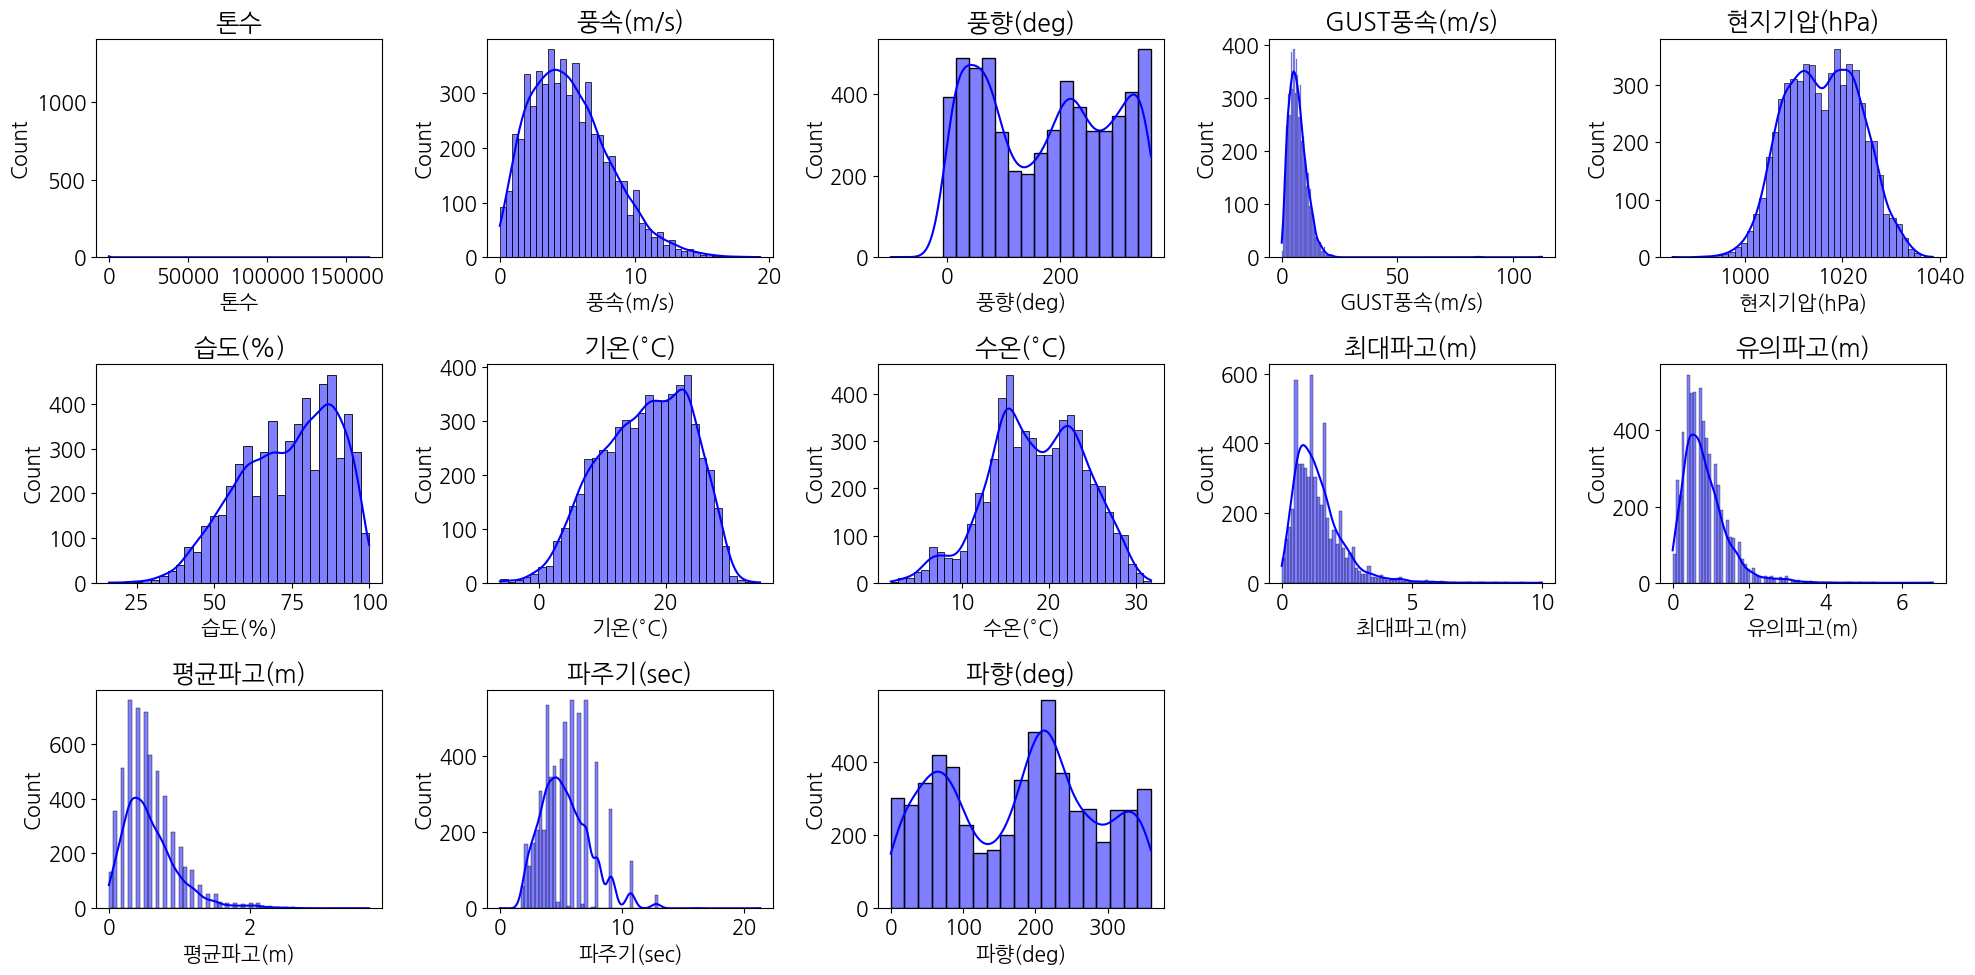

In [ ]:
plt.figure(figsize = (20, 10))
for i, idx in enumerate(start_df1.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(start_df1[idx], kde = True, color = 'b')
    plt.title(f'{idx}')
    plt.tight_layout()    